In [1]:
#Importing the libraries we are going to use
import pandas as pd
import random
from timeit import default_timer as timer
from matplotlib import pyplot as plt

In [2]:
def countingSort(array, place):
    size = len(array)
    output = [0] * size
    count = [0] * 10
    for i in range(0, size):
        index = array[i] // place
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = size - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(0, size):
        array[i] = output[i]
def radixSort(array):
    t_inicial = timer()
    max_element = max(array)
    place = 1
    while max_element // place > 0:
        countingSort(array, place)
        place *= 10
    t_final = timer()
    time = t_final-t_inicial
    return time

In [3]:
data = [121, 432, 564, 23, 1, 45, 788]
o = radixSort(data)
print(data)

[1, 23, 45, 121, 432, 564, 788]


In [13]:
def aleatorio(tamano):
    #Here I fill the array
    test = []
    for i in range (tamano):
        test.append(random.randint(1,2000))
    return test

#Here I create a pandas DataFrame so I can save my times
tabla = pd.DataFrame(columns=['Size','Time(s)'])
#Here I decide how many test I'm making
timing_f = mean_radix = 0
for i in range (1,10000,10):
    ra_nu = aleatorio(i)
    for j in range (1,10):
        timing_m = radixSort(ra_nu)
        timing_f = timing_f + timing_m
    mean_radix = timing_f / i        
    tr = {'Size':i,'Time(s)':mean_radix}
    tabla = tabla.append(tr,ignore_index=True)

In [14]:
tabla

,Size,Time(s)
0,1.0,0.000035
1,11.0,0.000045
2,21.0,0.000060
3,31.0,0.000225
4,41.0,0.000302
5,51.0,0.000355
6,61.0,0.000426
7,71.0,0.000520
8,81.0,0.000470
9,91.0,0.000233


In [15]:
tabla['Size'] = tabla['Size'].astype(int)
print("We are going to test the algorithm",10000/10,"times")

We are going to test the algorithm 1000.0 times


In [16]:
prueba1 = tabla.sort_values(by='Time(s)')

In [17]:
size = prueba1.Size.values
time_i = prueba1['Time(s)'].values

Text(0, 0.5, 'Time in seconds needed')

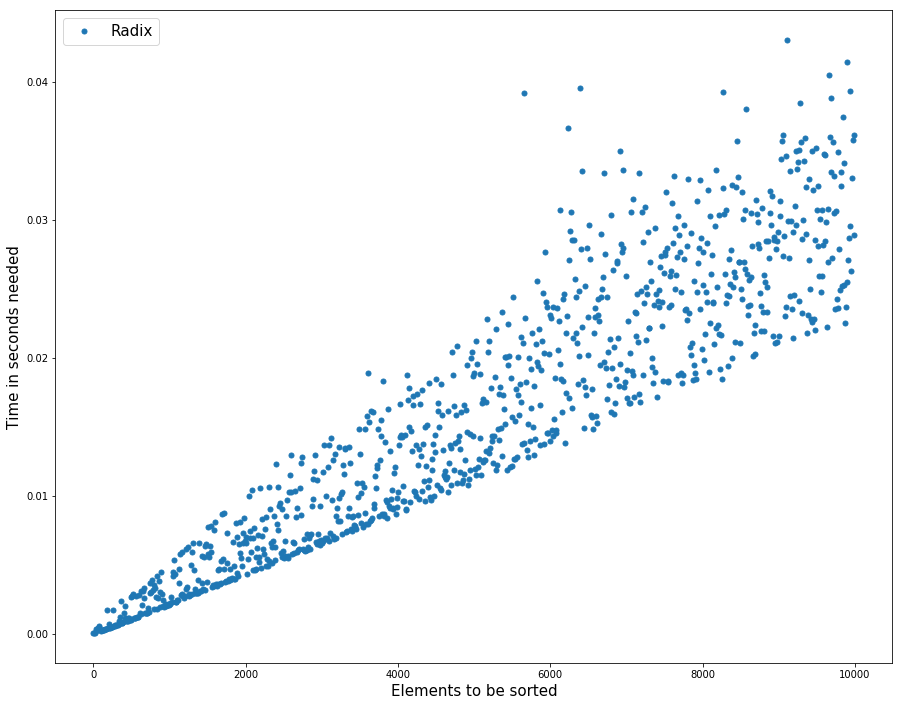

In [18]:
plt.figure(figsize=[15,12])
plt.plot(size,time_i, '.', label='Radix',markersize=10)
plt.legend(fontsize=15)
plt.xlabel('Elements to be sorted',fontsize = 15)
plt.ylabel('Time in seconds needed',fontsize = 15)